# An exploration of Ford GoBike data
## by Pamely ZANTOU

## Investigation Overview

In this investigation, we wanted to look for the relationship between Ford Gobike type of users, their travelled distance and rental duration.

## Dataset Overview

The data consists of 183412 bikes rentals and 16 variables describing each rental. These variables provide information about bikes, rental duration, users' profile and bikes' stations. 8460 data points were removed from the analysis due to inconsistencies or missing information.

## Distribution of rental duration

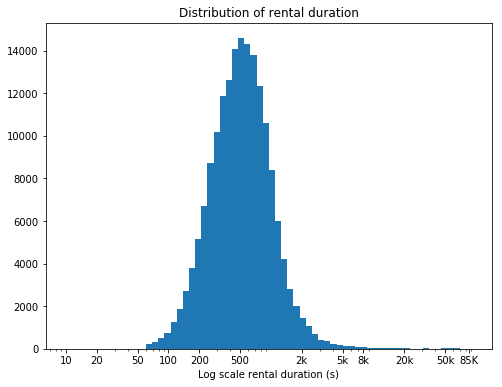

In [23]:
# the plot is highly skewed, so let's put it on a log scale instead
log_binsize = 0.06
bins = 10 ** np.arange(1, np.log10(bikes['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = bikes, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 2e3, 5e3, 8e3, 2e4, 5e4, 8.5e4], ['10', '20', '50', '100', '200', '500', '2k', '5k', '8k', '20k', '50k', '85K'])
plt.xlabel('Log scale rental duration (s)')
plt.title('Distribution of rental duration')
plt.show()

Rental duration are in second (s) and take large numbers, from 61s to 84548s. Plotted on logarithmic scale, the distribution of rental duration takes on a normal shape.

## Distribution of travelled distance.

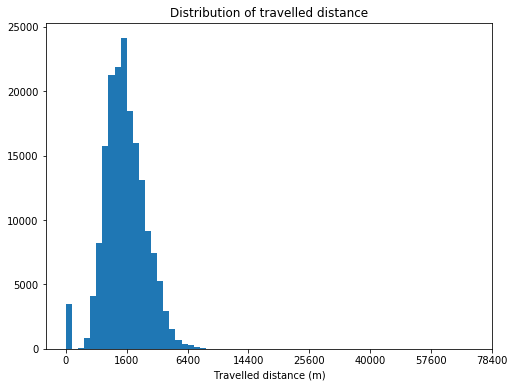

In [29]:
plt.figure(figsize=[8, 6])
bin_edges = np.arange(0, sqrt_trans(bikes['distance'].max())+4, 4)
plt.hist(bikes['distance'].apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(bikes['distance'].max())+40, 40 )
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))
plt.xlabel('Travelled distance (m)')
plt.title('Distribution of travelled distance');
plt.show()

Distance travelled is the distance between start and end stations. We used geographic coordinate to find it as the circular distance between points. Plot on square root scale the distribution of travelled distance is roughly normal.

## Proportion of members per age  group

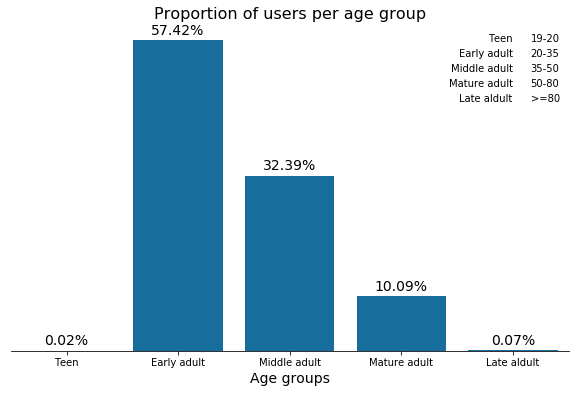

In [42]:
# set fig size
plt.figure(figsize = [10, 6])

#color
base_color = sns.color_palette("colorblind")[0]

# age groups count 
age_group_count = bikes.member_age_group.value_counts()


ax = sns.countplot(data=bikes, x='member_age_group', color=base_color)

# get the current xtick locations and labels
ticks_locs, ticks_labels = plt.xticks() 
# don't show yticks
plt.yticks([],[]) 
show_bar_proportion(age_group_count, ticks_locs, ticks_labels, 2000, 14)

# xlabel
plt.xlabel('Age groups', size=14)
# don't show ylabel        
plt.ylabel('')

# plot title
plt.title('Proportion of users per age group', size=16);

#legend
show_legend(ax)

#remove top and right spines from plot
sns.despine(left=True)

In the course of our exploration we grouped users by age. Five groups have been ifentified: Teen (19-20), Early adult (20-35), Middle adult (35-50), Mature adult (50-80) and Late aldult (>=80). Plotting the proportion of users per age group reveals that teenagers and old people rent less bikes. Early adult rent the most, followed by middle adult and then mature adults.

## Proportion of Subscribers and Consumers

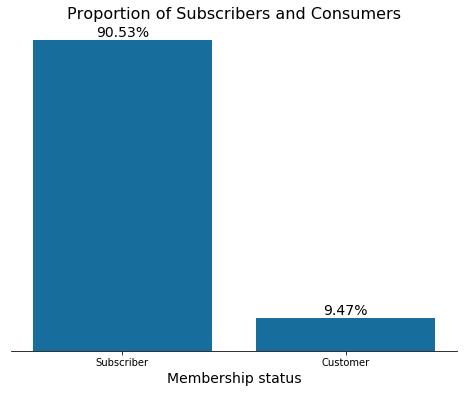

In [44]:
# set fig size
plt.figure(figsize = [8, 6])

#color
base_color = sns.color_palette("colorblind")[0]

# user type count 
user_type_count = bikes.user_type.value_counts()

# user type ordered 
type_order = user_type_count.index


sns.countplot(data=bikes, x='user_type', color=base_color, order=type_order)

# get the current xtick locations and labels
ticks_locs, ticks_labels = plt.xticks() 
# don't show yticks
plt.yticks([],[]) 
show_bar_proportion(user_type_count, ticks_locs, ticks_labels, 2000, 14)

# xlabel
plt.xlabel('Membership status', size=14)
# don't show ylabel        
plt.ylabel('')

# plot title
plt.title('Proportion of Subscribers and Consumers', size=16);

#remove top and right spines from plot
sns.despine(left=True)

Plotting membership status shows that there are more subscribers than simple customers. This means that customers quickly adopt the service. This can be due to quality of service but also to the need of bikes in their daily travels to save time, money or just for wellness. 

## Proportion of members per gender

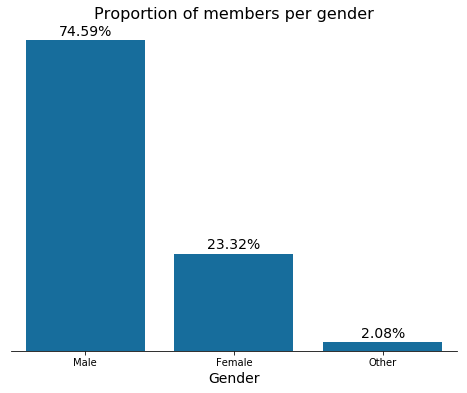

In [45]:
# set fig size
plt.figure(figsize = [8, 6])

#color
base_color = sns.color_palette("colorblind")[0]

# members' gender count 
gender_count = bikes.member_gender.value_counts()

# member gender ordered
gender_order = gender_count.index


sns.countplot(data=bikes, x='member_gender', color=base_color, order=gender_order)

# get the current xtick locations and labels
ticks_locs, ticks_labels = plt.xticks() 
# don't show yticks
plt.yticks([],[]) 
show_bar_proportion(gender_count, ticks_locs, ticks_labels, 2000, 14)

# xlabel
plt.xlabel('Gender', size=14)
# don't show ylabel        
plt.ylabel('')

# plot title
plt.title('Proportion of members per gender', size=16);

#remove top and right spines from plot
sns.despine(left=True)

More male rent bikes than female and other genders people. 

## Relationship between travelled distance and rental duration

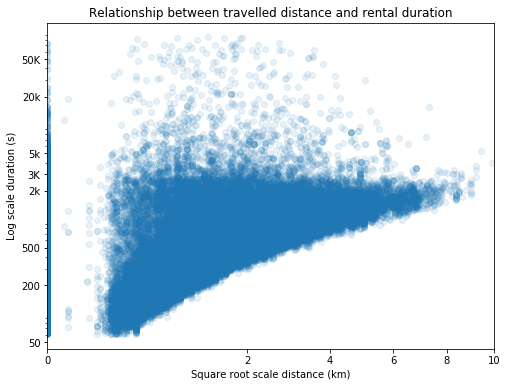

In [48]:
# scatter plot of distance vs.duration_sec, with log transform on duration_sec axis and
# square-root transform on distance

bikes['sr_distance'] = bikes['distance'].apply(sqrt_trans)

plt.figure(figsize=[8,6])

plt.scatter(data=bikes, x='sr_distance', y='duration_sec', alpha=1/10)

distance_ticks = [0, 2e3, 4e3, 6e3, 8e3, 10e3]

ticks_labels = ['0', '2', '4', '6', '8', '10']
plt.xticks(sqrt_trans(np.array(distance_ticks)), ticks_labels)

plt.xlim([0, sqrt_trans(10000)])

plt.xlabel('Square root scale distance (km)')

plt.yscale('log')
plt.yticks([50,  200, 500, 2e3, 3e3, 5e3, 2e4, 5e4], ['50', '200', '500', '2k', '3K', '5k', '20k', '50K'])
plt.ylabel('Log scale duration (s)');

plt.title('Relationship between travelled distance and rental duration')

plt.show()

Plotting the log scale duration and the square root scale distance produce an approximately a linear relationship. It comes out that most users rent bikes for 3000s (50 minutes) or less.  maybe for one-off trips.

## Distance and rental duration per week day

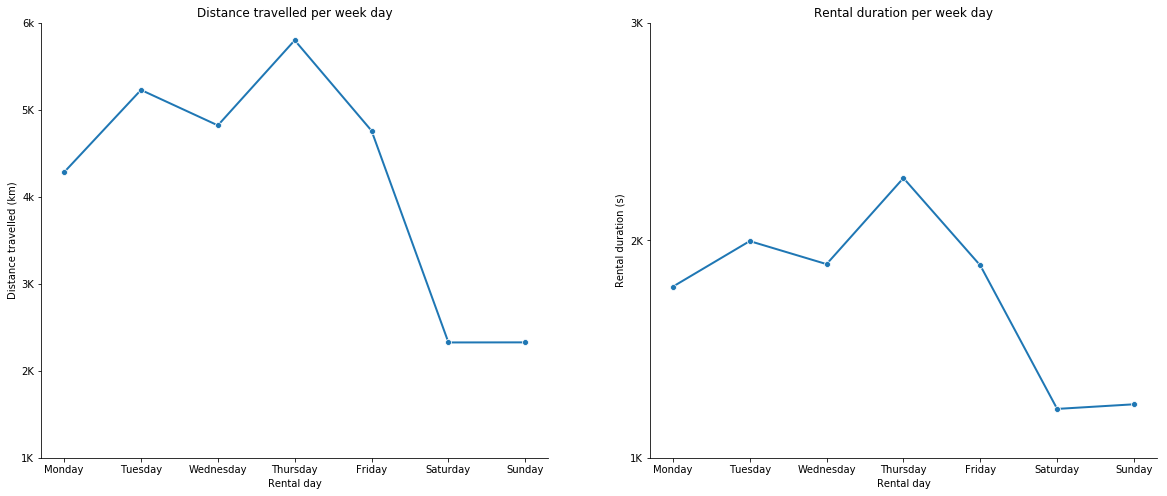

In [53]:
# set fig size
plt.figure(figsize = [20, 8])

# distance vs. rental_day subplot
plt.subplot(1,2,1)
sns.lineplot(x='rental_day', y='distance', data=distance_per_week, marker='o', linewidth=2, palette = base_color);

plt.yticks([1e7, 2e7, 3e7, 4e7, 5e7, 6e7], ['1K', '2K', '3K', '4k', '5K', '6k'])
plt.xlabel('Rental day')
plt.ylabel('Distance travelled (km)')
plt.title('Distance travelled per week day')

# distance vs. rental_day subplot
plt.subplot(1,2,2)
sns.lineplot(x='rental_day', y='duration_sec', data=duration_per_week, marker='o', linewidth=2, palette = base_color);

plt.yticks([1e7, 2e7, 3e7], ['1K', '2K', '3K'])
plt.xlabel('Rental day')
plt.ylabel('Rental duration (s)')
plt.title('Rental duration per week day')

sns.despine(right=True)
plt.show()

Distance travelled and rental duration are both higher during business days. We can see both subplots' peak on Thursday. Therefore, people rent bikes more during business day. Considering the fact that Early Middle and Mature adults rent more bikes, we may think that renters user bikes for their ponctual reasons. For example, to get to work.

## Membership status count per gender

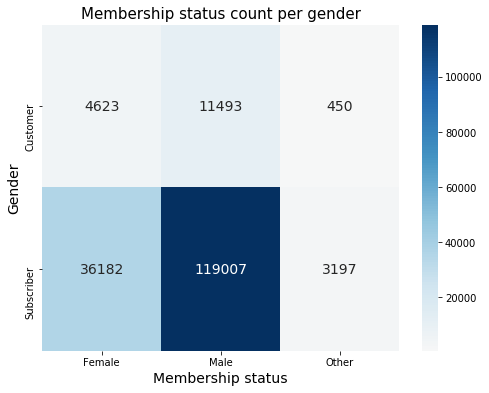

In [60]:
plt.figure(figsize = [8, 6])
ax = sns.heatmap(tg_counts, annot = True, fmt = 'd', cmap = 'RdBu', center = 0, annot_kws={"size": 14})
plt.xlabel('Membership status', size=14)
plt.ylabel('Gender', size=14)
plt.title('Membership status count per gender', size=15);
plt.show()

The heatmap suggests that there are more subscribers than customers for all genders.

## Distance travelled and rental duration per age group

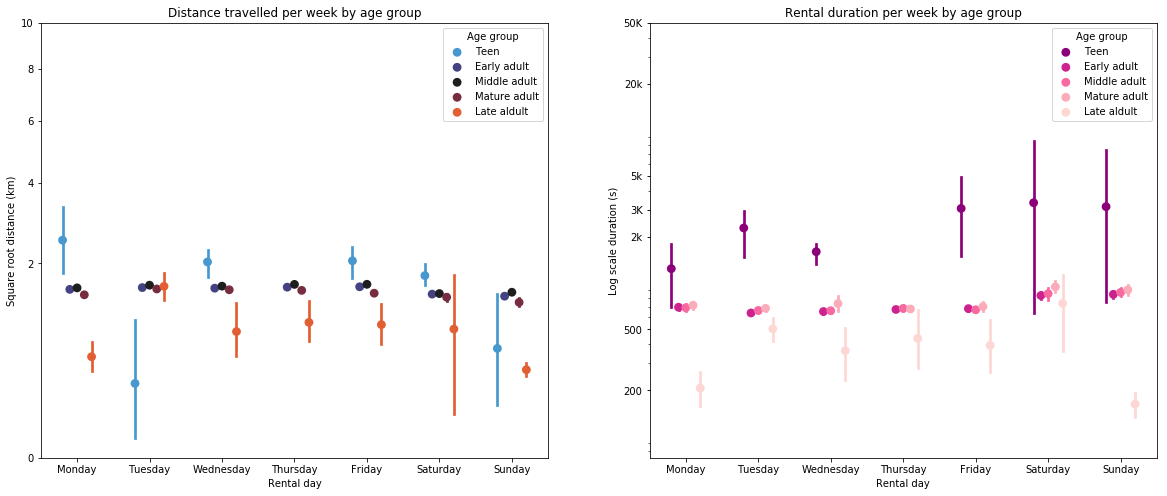

In [64]:
# multivariate plot 

# set fig size
plt.figure(figsize = [20, 8])

# distance vs. rental_day subplot
plt.subplot(1,2,1)
distance_ticks = [0, 2e3, 4e3, 6e3, 8e3, 10e3]
distance_ticks_labels = ['0', '2', '4', '6', '8', '10']
ax_dist = sns.pointplot(data = bikes, x = 'rental_day', y = 'sr_distance', hue = 'member_age_group',
                  dodge = 0.4, linestyles = "", palette = 'icefire')
plt.xlabel('Rental day')
plt.ylabel('Square root distance (km)')
plt.yticks(sqrt_trans(np.array(distance_ticks)), distance_ticks_labels)
plt.title('Distance travelled per week by age group')
plt.legend(title = 'Age group');
ax_dist.set_yticklabels([],minor = True)

# distance vs. rental_day subplot
plt.subplot(1,2,2)
duration_ticks = [200, 500, 2e3, 3e3, 5e3, 2e4, 5e4]
duration_ticks_labels = ['200', '500', '2k', '3K', '5k', '20k', '50K']
ax_dur = sns.pointplot(data = bikes, x = 'rental_day', y = 'duration_sec', hue = 'member_age_group',
                  dodge = 0.4, linestyles = "", palette = 'RdPu_r')
plt.xlabel('Rental day')
plt.ylabel('Log scale duration (s)')
plt.yscale('log')
plt.yticks(duration_ticks, duration_ticks_labels)
plt.title('Rental duration per week by age group')
plt.legend(title = 'Age group');

ax_dur.set_yticklabels([],minor = True)

plt.show()

Teenagers ride more and spend more time with bikes than adults. Adults (early, middle and mature) use of bikes is very constant over time. This last, show that adults use  bikes for periodic trips. 